# <a id='toc1_'></a>[Parkinson's Disease Freezing of Gait Dataset](#toc0_)
The Parkinson's Disease Freezing of Gait Dataset comprises some 979 files in three collections: 
- Study Metadata: Information about the subjects, their FoG events, and the test tasks performed.
- Series Metadata: Subject, visit, test, and medical condition data for the tDCS FoG, DeFoG, and Daily-Living datasets. 
- Series Data: Vertical, mediolateral, and anteroposterior acceleration data obtained from lower-back sensors 

**Study Metadata**
Three files provide subject, event, and task background and context information for the freezing of gait detection effort. 

| # | Dataset      | Description                                     |
|---|--------------|-------------------------------------------------|
| 1 | subjects.csv | Metadata for each subject in the study.         |
| 2 | events.csv   | Metadata for each FoG event in all data series. |
| 3 | tasks.csv    | Task metadata for series in the defog dataset.  |

**Series Metadata**
Visits, tests performed, medication condition and subject metadata are included in the following files:
| # | Dataset              | Description                                                                            |
|---|----------------------|----------------------------------------------------------------------------------------|
| 1 | tdcsfog_metadata.csv | Subject,visit, test, and medication metadata for each series in the   tdcsfog dataset. |
| 2 | defog_metadata.csv   | Subject, visit and medication metadata for each series in the defog   dataset.         |
| 3 | daily_metadata.csv   | Metadata for each series in the daily dataset                                          |


**Series Data**
Series data, including timestamps, lower-back sensor acceleration data, event indicator variables, and event type annotations comprise the core data used during the FoG detection task. The sensor data are in the following folders:

| # | Dataset               | Description                                                               | # Files |
|---|-----------------------|---------------------------------------------------------------------------|---------|
| 1 | tdcsfog training data | Data series collected in the lab                                          | 833     |
| 2 | defog training data   | Data series collected in the subject's home                               | 91      |
| 3 | notype training data  | Data series from the defog dataset, lacking event-type annotations        | 46      |
| 4 | test data             | A test tdsfog and defog folder containing Time, AccV, AccML, and   AccAP  | 2       |





**Table of contents**<a id='toc0_'></a>    
- [Parkinson's Disease Freezing of Gait Dataset](#toc1_)    
  - [Study Metadata](#toc1_1_)    
    - [Subject Metadata](#toc1_1_1_)    
      - [Subject Demographics](#toc1_1_1_1_)    
      - [Subject Years Since Diagnosis](#toc1_1_1_2_)    
      - [Subject Unified Parkinson's Disease Rating Scale (UPDRS)](#toc1_1_1_3_)    
        - [UPDRS By Gender and Medication Condition](#toc1_1_1_3_1_)    
        - [UPDRS By Medication Condition and Gender](#toc1_1_1_3_2_)    
      - [Subject New Freezing of Gait Questoinnaire](#toc1_1_1_4_)    
      - [Subject Dataset Summary](#toc1_1_1_5_)    
    - [Events Dataset](#toc1_1_2_)    
      - [Overview](#toc1_1_2_1_)    
      - [Event Types](#toc1_1_2_2_)    
      - [Kinetic vs Akinetic Events](#toc1_1_2_3_)    
      - [Event Durations](#toc1_1_2_4_)    
    - [Task Dataset](#toc1_1_3_)    
  - [Series Metadata](#toc1_2_)    
    - [tDCS FOG Series Metadata](#toc1_2_1_)    
    - [DeFOG Series Metadata](#toc1_2_2_)    
    - [Daily-Living Series Metadata](#toc1_2_3_)    
  - [Series Data](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML, display_html
import matplotlib.pyplot as plt
CSS = """
.output {
    align-items: center;
    }
    """
from parkinsons.data.metadata import Subject, Event, Task, TDCSFoG, DeFOG, DailyLiving


In [2]:
# Metadata Filepaths 
SUBJECT_METADATA_FILEPATH = "data/subjects.csv"
TASK_METADATA_FILEPATH = "data/tasks.csv"
EVENT_METADATA_FILEPATH = "data/events.csv"
TDCSFOG_METADATA_FILEPATH = "data/tdcsfog_metadata.csv"
DEFOG_METADATA_FILEPATH = "data/defog_metadata.csv"
DAILY_METADATA_FILEPATH = "data/daily_metadata.csv"


## <a id='toc1_1_'></a>[Study Metadata](#toc0_)

Three files comprise the study metadata:

| # | Dataset      | Description                                     |
|---|--------------|-------------------------------------------------|
| 1 | subjects.csv | Metadata for each subject in the study.         |
| 2 | events.csv   | Metadata for each FoG event in all data series. |
| 3 | tasks.csv    | Task metadata for series in the defog dataset.  |

The following summarizes the subject, event, and task metadata from the study.

### <a id='toc1_1_1_'></a>[Subject Metadata](#toc0_)
The subjects metadata file includes:
| Variable     | Description                                                   |
|--------------|---------------------------------------------------------------|
| Subject      | Subject identifier                                            |
| Visit        | The visit for subjects in the daily and defog datasets        |
| Age          | Age of subject                                                |
| Sex          | Gender of subject                                             |
| YearsSinceDx | Years since Parkinson's diagnosis                             |
| UPDRSIII_On  | Unified Parkinson's Disease Rating Scale score on medication  |
| UPDRSIII_Off | Unified Parkinson's Disease Rating Scale score off medication |
| NFOGQ        | The New Freezing of Gait Questionnaire (NFOG-Q)               |


In [3]:
subjects = Subject(name='Subjects', filepath=SUBJECT_METADATA_FILEPATH)
subjects.info()

,Column,Dtype,Valid,Null,Validity,Unique,Cardinality,Size
0,Subject,object,173,0,1.00,136,0.79,10899
1,Visit,float64,111,62,0.64,2,0.01,1384
2,Age,int64,173,0,1.00,34,0.20,1384
3,Sex,object,173,0,1.00,2,0.01,10034
4,YearsSinceDx,float64,173,0,1.00,30,0.17,1384
5,UPDRSIII_On,float64,172,1,0.99,51,0.29,1384
6,UPDRSIII_Off,float64,132,41,0.76,47,0.27,1384
7,NFOGQ,int64,173,0,1.00,22,0.13,1384


There are 136 unique subjects in the study; some of whom appear on both the Daily Living and DeFOG datasets, accounting for a total of 173 observations. Visit data are only available for 111 subjects from the Daily Living and DeFOG datasets. All but one subject completed the Unified Parkingson's Disease Rating Scale *on* medication; whereas 76% of the subjects completed the UPDRSIII *off* medication. All subjects completed the New Freezing of Gait Questionnaire.

#### <a id='toc1_1_1_1_'></a>[Subject Demographics](#toc0_)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Sex,,,,,,,,,,
F,52.00,67.81,7.95,51.00,56.10,60.00,69.00,73.00,79.90,82.00
M,121.00,67.74,8.02,28.00,56.00,63.00,68.00,73.00,77.00,94.00


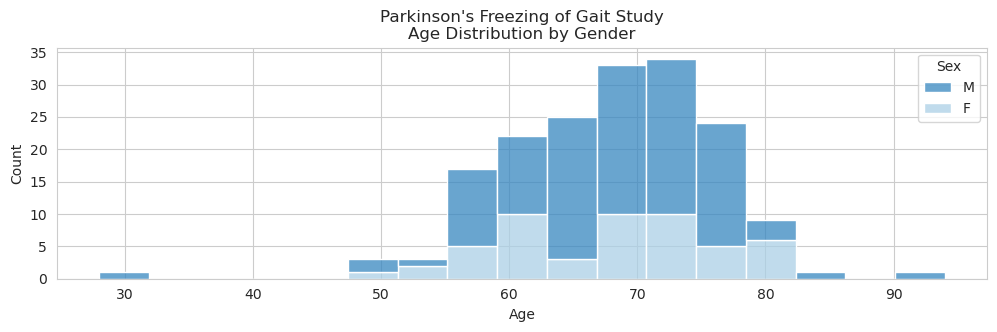

In [4]:
subjects.histogram(x='Age', grouping='Sex', title=f"Parkinson's Freezing of Gait Study\nAge Distribution by Gender")
subjects.describe_group(group_by='Sex', column='Age')

Moving to demographics, males numbered more than twice that of the female subjects; yet, age distributions were quite similar, centering on about 67 years of age for all subjects.

#### <a id='toc1_1_1_2_'></a>[Subject Years Since Diagnosis](#toc0_)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Sex,,,,,,,,,,
F,52.00,8.64,5.69,0.42,1.50,4.38,7.50,13.00,16.90,30.00
M,121.00,11.13,6.41,1.00,3.00,6.00,10.00,16.00,22.00,27.00


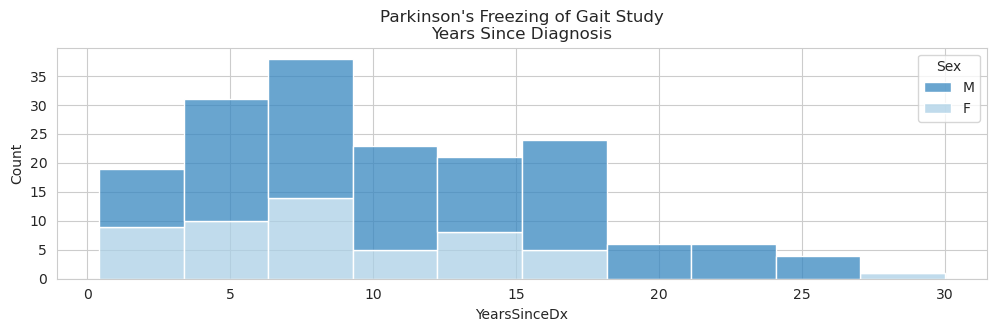

In [5]:
subjects.histogram(x='YearsSinceDx', grouping='Sex', title=f"Parkinson's Freezing of Gait Study\nYears Since Diagnosis")
subjects.describe_group(group_by='Sex', column='YearsSinceDx')

Average years since diagnosis for male and female subjects was 11.1 and 8.6 years respectively. Yet, the range was considerable; with some diagnosed within recent months and others having lived 30 years with the disease.

#### <a id='toc1_1_1_3_'></a>[Subject Unified Parkinson's Disease Rating Scale (UPDRS)](#toc0_)
The Unified Parkinson's Disease Rating Scale (UPDRS) is a tool to measure the severity and progression of Parkinson's Disease with higher scores indicating greater severity. Subjects are administered the questionnaire in on and off medication conditions.

##### <a id='toc1_1_1_3_1_'></a>[UPDRS By Gender and Medication Condition](#toc0_)

,count,mean,std,min,25%,50%,75%,max
Instrument,,,,,,,,
UPDRSIII_Off,39.0,39.6,13.6,15.0,28.5,41.0,49.0,69.0
UPDRSIII_On,51.0,29.7,12.8,5.0,21.0,27.0,38.0,67.0
,count,mean,std,min,25%,50%,75%,max
Instrument,,,,,,,,
UPDRSIII_Off,93.0,44.3,12.6,18.0,35.0,44.0,50.0,91.0
UPDRSIII_On,121.0,36.2,12.2,10.0,28.0,37.0,43.0,79.0


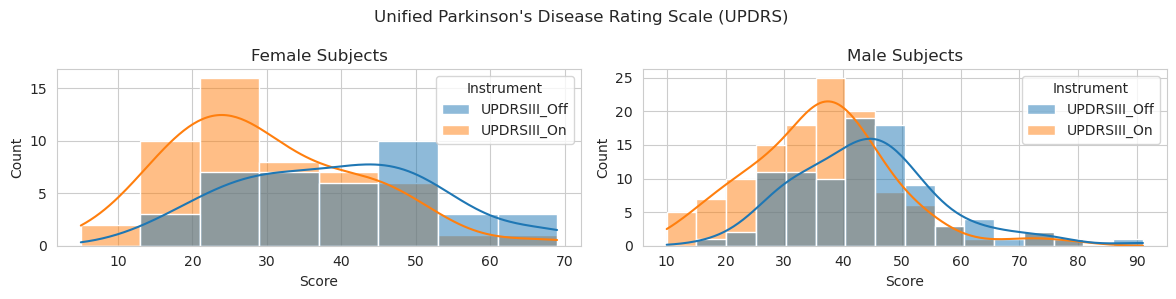

In [6]:

df1 = subjects.describe_updrs(column='Score', filter_var='Sex', filter_val='F', group_var='Instrument')
df2 = subjects.describe_updrs(column='Score', filter_var='Sex', filter_val='M', group_var='Instrument')

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Female Subjects").set_precision(1)
df2_style = df2.style.set_table_attributes("style='display:inline;'").set_caption("Male Subjects").set_precision(1)

display(HTML("<H3><center>Unified Parkinson's Disease Rating Scale (UPDRS)<Br>By Gender and Medication Condition<center><H3>"))
display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)
subjects.updrs_gender()

As expected, both male and female subjects indicate a decrease in symptom severity on medication; although, the female subjects had slightly greater relative symptom relief on average than their male counterparts, 33% vs 22% for the men. 
##### <a id='toc1_1_1_3_2_'></a>[UPDRS By Medication Condition and Gender](#toc0_)

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,39.0,39.6,13.6,15.0,28.5,41.0,49.0,69.0
M,93.0,44.3,12.6,18.0,35.0,44.0,50.0,91.0
,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,51.0,29.7,12.8,5.0,21.0,27.0,38.0,67.0
M,121.0,36.2,12.2,10.0,28.0,37.0,43.0,79.0


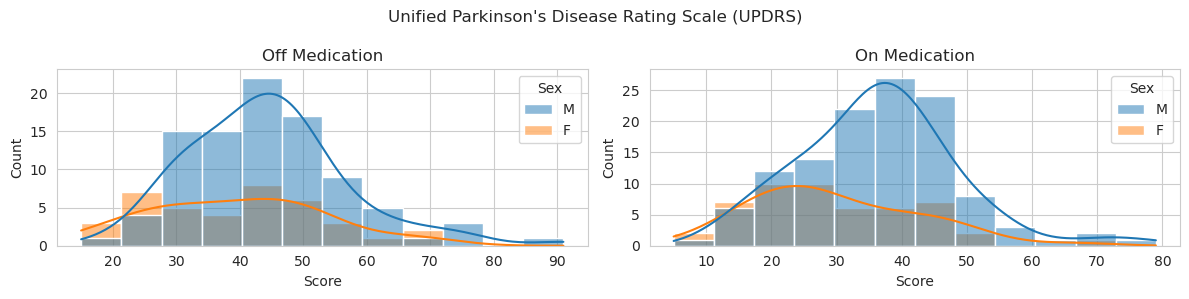

In [7]:

df1 = subjects.describe_updrs(column='Score', filter_var='Instrument', filter_val='UPDRSIII_Off', group_var='Sex')
df2 = subjects.describe_updrs(column='Score', filter_var='Instrument', filter_val='UPDRSIII_On', group_var='Sex')

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Off Medication").set_precision(1)
df2_style = df2.style.set_table_attributes("style='display:inline;'").set_caption("On Medication").set_precision(1)

display(HTML("<H3><center>Unified Parkinson's Disease Rating Scale (UPDRS)<Br>By Medication Condition and Gender<center><H3>"))
display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)
subjects.updrs_med()

Males presented slightly greater baseline (off medication) symptom severity on average. Though symptoms generally improved on medication for all subjects, females exhibited slightly lower scores with treatment.

#### <a id='toc1_1_1_4_'></a>[Subject New Freezing of Gait Questoinnaire](#toc0_)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Sex,,,,,,,,,,
F,52.0,15.8,8.8,0.0,0.0,11.8,18.0,22.0,28.0,29.0
M,121.0,17.7,6.9,0.0,0.0,17.0,20.0,22.0,25.0,26.0


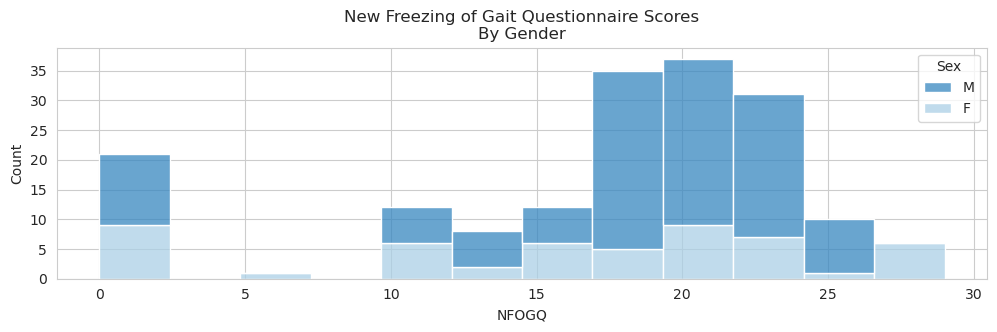

In [8]:
display(HTML("<H3><center>New Freezing of Gait Questionnaire (NFOG-Q)<Br>By Gender<center><H3>"))


df = subjects.describe_group(group_by='Sex', column='NFOGQ')
df_style = df.style.set_table_attributes("style='display:inline; margin-left:370px;'").set_precision(1)
display_html(df_style._repr_html_(), raw=True)
subjects.histogram(x='NFOGQ', grouping='Sex', title="New Freezing of Gait Questionnaire Scores\nBy Gender")

As noted with the UPDRS, symptom severity centered slightly higher for males.

#### <a id='toc1_1_1_5_'></a>[Subject Dataset Summary](#toc0_)
This collection captures demographics, disease duration, and progression for 52 female and 121 male subjects with an average age of about 67 years. Female subjects tended to have slightly shorter histories with the disease than their male counterparts and exhibited lower symptom severity, both on and off medication. Assessments also suggest that the female subjects had greater responses to treatment, with an average decrease in UPDRS scores of 33%, compared to a 22% reduction in symptom severity for the male subjects.

### <a id='toc1_1_2_'></a>[Events Dataset](#toc0_)
The event dataset provides metadata for each FoG event in all the data series, and contains:

| Variable   | Description                                                                   |
|------------|-------------------------------------------------------------------------------|
| Id         | The data series in which the event occurred                                   |
| Init       | Time the event began                                                          |
| Completion | Time the event ended                                                          |
| Type       | Whether the event was StartHesitation, Turn, or Walking                       |
| Kinetic    | Whether the event was kinetic and involved movement, or akinetic, or   static |
| Duration   | The duration of the event                                                     |

#### <a id='toc1_1_2_1_'></a>[Overview](#toc0_)

In [9]:
events = Event(name='Events', filepath=EVENT_METADATA_FILEPATH)
events.info()

,Column,Dtype,Valid,Null,Validity,Unique,Cardinality,Size
0,Id,object,3712,0,1.00,535,0.14,248704
1,Init,float64,3712,0,1.00,3701,1.00,29696
2,Completion,float64,3712,0,1.00,3701,1.00,29696
3,Type,object,2669,1043,0.72,3,0.00,198607
4,Kinetic,float64,2669,1043,0.72,2,0.00,29696
5,Duration,float64,3712,0,1.00,2968,0.80,29696


A total of 3712 events for 535 unique data series are summarized in this dataset. Event type and kinetic information is available for the 72% of the events; those from tDCS FOG and DeFOG datasets.

#### <a id='toc1_1_2_2_'></a>[Event Types](#toc0_)
Three types of freezing of gate events were captured: Start Hesitation, Turn, and Walking, and were distributed as follows.

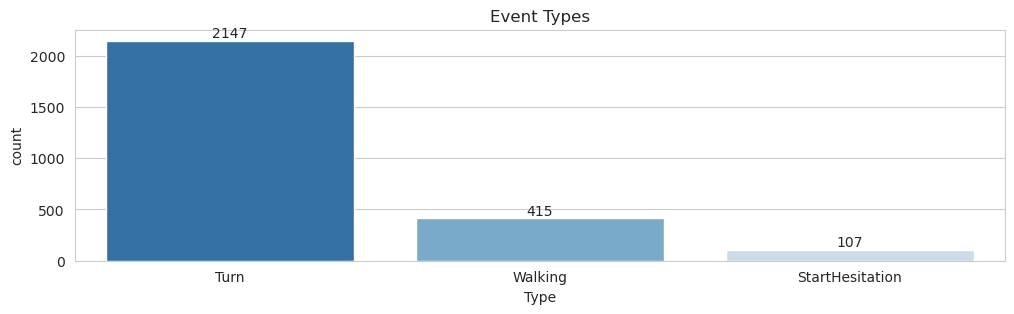

In [10]:
_ = events.countplot(x='Type', title='Event Types')

Turn events dominate, representing 80% of the series data.

#### <a id='toc1_1_2_3_'></a>[Kinetic vs Akinetic Events](#toc0_)

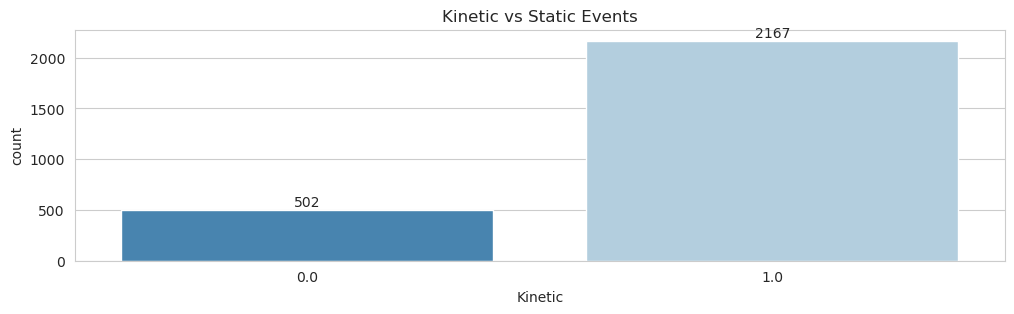

In [11]:
_ = events.countplot(x='Kinetic', title='Kinetic vs Static Events')

Similarly kinetic events account for 80% of the events in the series.
#### <a id='toc1_1_2_4_'></a>[Event Durations](#toc0_)

,count,mean,std,min,5%,25%,50%,75%,95%,max
Duration,"3,712.00",7.80,23.57,0.00,0.43,1.16,2.52,6.45,24.99,581.98


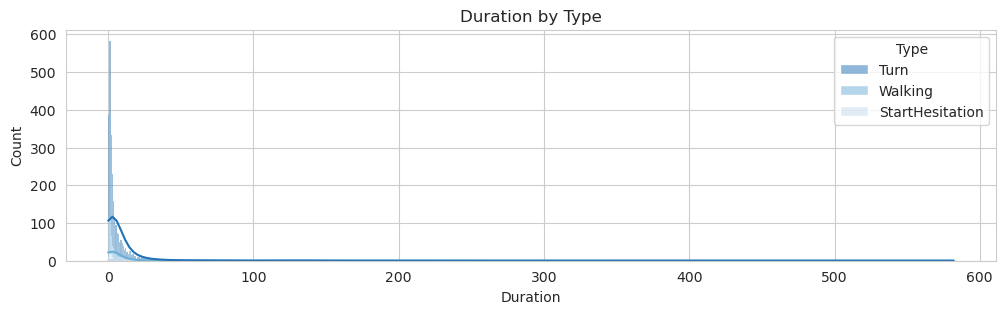

In [12]:
_ = events.histplot(x="Duration", hue='Type', multiple='stack')
events.describe(column='Duration')

The median event duration was about 2.5 seconds; however, events lasting nearly 10 minutes have been recorded.

,count,mean,std,min,5%,25%,50%,75%,95%,max
Type,,,,,,,,,,
StartHesitation,107.00,22.34,37.78,0.24,0.61,1.50,3.32,16.64,120.58,151.24
Turn,"2,147.00",8.83,28.09,0.00,0.44,1.26,2.68,7.30,26.26,581.98
Walking,415.00,6.29,17.32,0.00,0.16,0.88,2.01,4.79,16.80,164.20


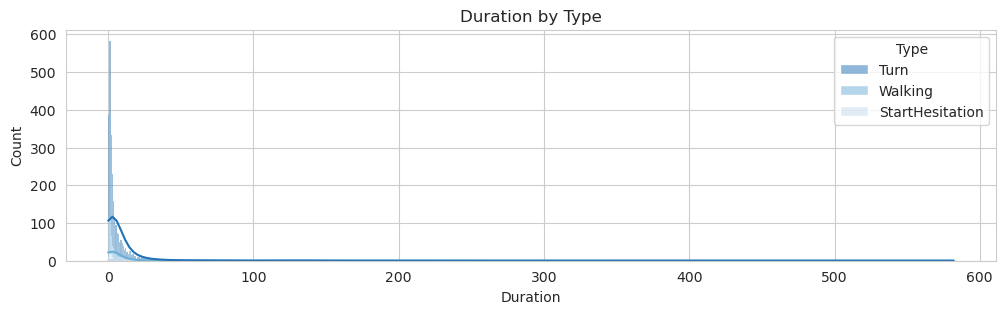

In [13]:
events.describe_group(group_by='Type', column='Duration')
_ = events.histplot(x='Duration', hue='Type', multiple='stack')

Median duration for StartHesitation, Turn, and Walking events didn't exceed four seconds, and maximum durations for StartHesitation and Walking durations were three minutes or less. The extreme event durations, upwards of nearly ten minutes, are associated with the Turn events recorded in the study.

### <a id='toc1_1_3_'></a>[Task Dataset](#toc0_)
Task metadata for the DeFOG dataset. (Not relevant for the tDCSFOG and Daily Living series)

| Variable | Description                                    |
|----------|------------------------------------------------|
| Id       | The data series where the task was measured    |
| Task     | One of seven tasks types in the DeFOG protocol |
| Begin    | Time(s) the task began                         |
| End      | Time(s) the task ended                         |
| Duration | Duration of the task in seconds                |

In [14]:
task = Task(name='Tasks', filepath=TASK_METADATA_FILEPATH)
task.info()

,Column,Dtype,Valid,Null,Validity,Unique,Cardinality,Size
0,Id,object,2817,0,1.00,137,0.05,188739
1,Begin,float64,2817,0,1.00,2656,0.94,22536
2,End,float64,2817,0,1.00,2779,0.99,22536
3,Task,object,2817,0,1.00,31,0.01,176724
4,Duration,float64,2817,0,1.00,2407,0.85,22536


There are 2817 observations of 31 unique tasks performed in subjects' homes. Average Task durations are provided below.

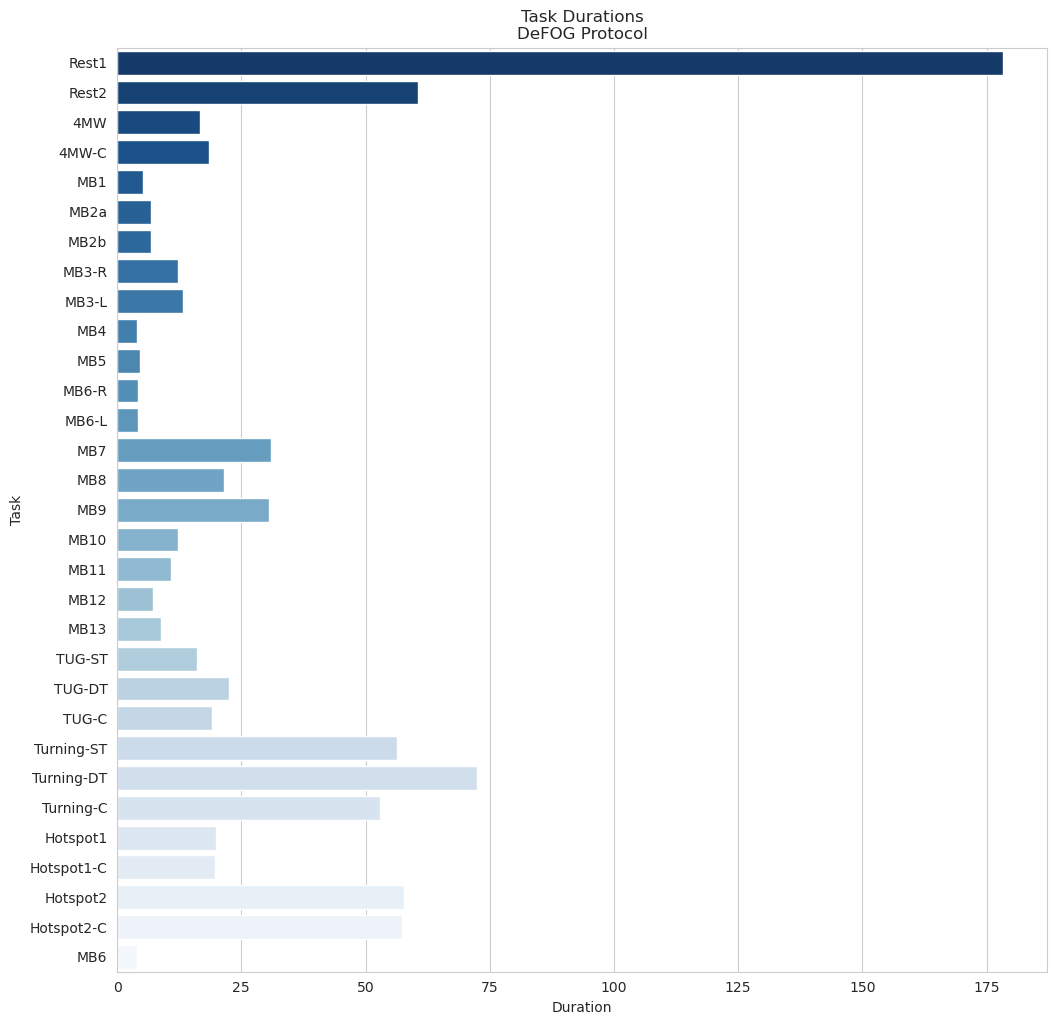

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
_ = task.barplot(x='Duration', y='Task', ax=ax, title="Task Durations\nDeFOG Protocol")

## <a id='toc1_2_'></a>[Series Metadata](#toc0_)
### <a id='toc1_2_1_'></a>[tDCS FOG Series Metadata](#toc0_)

| # | Variable   | Description                                                    |
|---|------------|----------------------------------------------------------------|
| 1 | Subject    | Subject identifier                                             |
| 2 | Visit      | Visit type number                                               |
| 3 | Test       | Which of the three tests performed. Values in [1,2,3]                            |
| 4 | Medication | Indicates whether patient was 'on' or 'off' Parkinson's medication |

In [16]:
tdcsfog_meta = TDCSFoG(name='tDCSFoG', filepath=TDCSFOG_METADATA_FILEPATH)
tdcsfog_meta.info()


,Column,Dtype,Valid,Null,Validity,Unique,Cardinality,Size
0,Id,object,833,0,1.00,833,1.00,55811
1,Subject,object,833,0,1.00,62,0.07,52479
2,Visit,int64,833,0,1.00,7,0.01,6664
3,Test,int64,833,0,1.00,3,0.00,6664
4,Medication,object,833,0,1.00,2,0.00,49444


These data comprise 833 series for 62 subjects. The seven lab visit types included: 
- a baseline assessment, 
- two post-treatment assessments for different treatment stages, and 
- one follow-up assessment. 

The three test types: 1,2 and 3, were as follows:
1. Single Task
2. Dual-Motor Task: Performing a single task while performing a second task, i.e. while carrying a tray with a bottle on it, and 
3. Motor–Cognitive Task:  Performing a Dual-Motor task while performing a cognitive test, i.e., performing a series of subtractions.

In [17]:
tdcsfog_meta.sample()

,Id,Subject,Visit,Test,Medication
185,375beaf4dc,f28003,20,2,on
42,0b684505f4,598953,2,2,on
826,fe7d3b45f2,a7a523,3,1,on
530,a26a6128d5,bae0ce,19,1,on
256,50dee8f15a,dd3a2d,2,3,off


### <a id='toc1_2_2_'></a>[DeFOG Series Metadata](#toc0_)
The subject, visit, and medication condition data are for the 45 patients who underwent a FoG-provoking protocol in their homes. 

| # | Variable   | Description                                                    |
|---|------------|----------------------------------------------------------------|
| 1 | Subject    | Subject identifier                                             |
| 2 | Visit      | Visit identifier                                               |
| 3 | Medication | Indicates whether patient was on or off Parkinson's medication |

In [18]:
defog_meta = DeFOG(name='DeFoG', filepath=DEFOG_METADATA_FILEPATH)
defog_meta.info()

,Column,Dtype,Valid,Null,Validity,Unique,Cardinality,Size
0,Id,object,137,0,1.00,137,1.00,9179
1,Subject,object,137,0,1.00,45,0.33,8631
2,Visit,int64,137,0,1.00,2,0.01,1096
3,Medication,object,137,0,1.00,2,0.01,8151


### <a id='toc1_2_3_'></a>[Daily-Living Series Metadata](#toc0_)
These Daily-living metadata are for 65 people with Parkinson's Disease who were recorded using the same device as in the home FoG-provoking dataset (the DeFOG dataset). The daily-living recordings contain ~one week of unlabeled, continuous recordings from an accelerometer device placed on the lower back of the subjects at 100Hz, during their daily living activity.

| # | Variable               | Description                                    |
|---|------------------------|------------------------------------------------|
| 1 | Id                     | Series identifier                              |
| 2 | Subject                | Subject identifier                             |
| 3 | Visit                  | Visit identifier                               |
| 4 | Beginning of Recording | The time recording was intiated for the series |

In [19]:
daily_living_meta = DailyLiving(name='Daily-Living', filepath=DAILY_METADATA_FILEPATH)
daily_living_meta.info()

,Column,Dtype,Valid,Null,Validity,Unique,Cardinality,Size
0,Id,object,65,0,1.00,65,1.00,4355
1,Subject,object,65,0,1.00,65,1.00,4095
2,Visit,int64,65,0,1.00,2,0.03,520
3,Beginning of recording [00:00-23:59],object,65,0,1.00,18,0.28,4030


That wraps up the metadata for the study. Next up? The series data which will be used for the Freezing of Gait detection task. 

## <a id='toc1_3_'></a>[Series Data](#toc0_)